# Based on the room type-one has to find the prices in different neighbourhood_group

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
os.getcwd()

'C:\\Users\\svlsrao\\Documents\\hack\\Hackatho'

In [2]:
path='C:\\Users\\svlsrao\\Documents\\First-Hackathon/file/Train.csv'
data=pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34214 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34213 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     

# Find the unique type of rooms

In [3]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# dataframes containing only Private room, Entire home/apt and Shared room

In [4]:
pr=data.loc[data['room_type']=='Private room']
home=data.loc[data['room_type']=='Entire home/apt']
Sr=data.loc[data['room_type']=='Shared room']

In [5]:
data.shape

(34226, 16)

In [6]:
pr.shape

(15594, 16)

In [7]:
home.shape

(17829, 16)

In [8]:
Sr.shape

(803, 16)

# checking unique neighbourhood_group

In [9]:
pr['neighbourhood_group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

# description of price based on the grouping by neighbourhood.

In [10]:
pr.groupby(pr['neighbourhood_group']).price.describe()
home.groupby(home['neighbourhood_group']).price.describe()
Sr.groupby(Sr['neighbourhood_group']).price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,40.0,63.550000,123.463677,20.0,27.5,30.0,52.00,800.0
Brooklyn,272.0,52.257353,60.448813,0.0,30.0,36.0,47.00,725.0
Manhattan,340.0,88.429412,91.683136,10.0,50.0,69.0,89.25,1000.0
Queens,146.0,73.767123,194.867383,11.0,30.0,37.5,50.75,1800.0
Staten Island,5.0,63.400000,57.743398,13.0,29.0,30.0,95.00,150.0


# Data variation
    - Lot of outliers are present in the prices 
    - Mean is greater than median 
    - we can remove the outliers from the data and implement the regression to predict the prices

In [11]:
pr.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
10,4823959,Private room for 2 in cool BK apt,24633966,Phil,Brooklyn,Kensington,40.64469,-73.97086,Private room,50,14,0,NaN,NaN,1,0
11,20817201,Private Room in Trendy Williamsburg Loft,643120,Sam,Brooklyn,Williamsburg,40.71591,-73.95513,Private room,50,4,56,2019-06-20,2.53,4,8
14,5040218,LUX Blg-Prime Area! Lg PRIVATE RM & BATH w/VIEWS!,26019828,Sonia,Manhattan,Hell's Kitchen,40.76159,-73.99824,Private room,69,2,22,2019-03-20,0.64,2,7
20,17224372,Friendly Room 20-202,115993835,Shimin,Brooklyn,Sunset Park,40.63992,-74.00760,Private room,28,1,31,2019-03-10,1.08,5,1


# Now plot the average price of the individual room type in different neighbourhood_groups
Since the difference of median and mean prices for each category was large so the average prices are influenced mainly due to outliers

Text(0, 0.5, 'Price ($/night)')

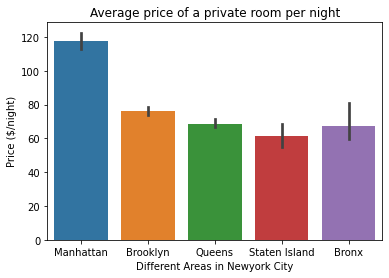

In [12]:
sns.barplot(pr['neighbourhood_group'],pr['price'])
plt.title('Average price of a private room per night')
plt.xlabel('Different Areas in Newyork City')
plt.ylabel('Price ($/night)')

# Box plot for each room_type and different neighbourhood

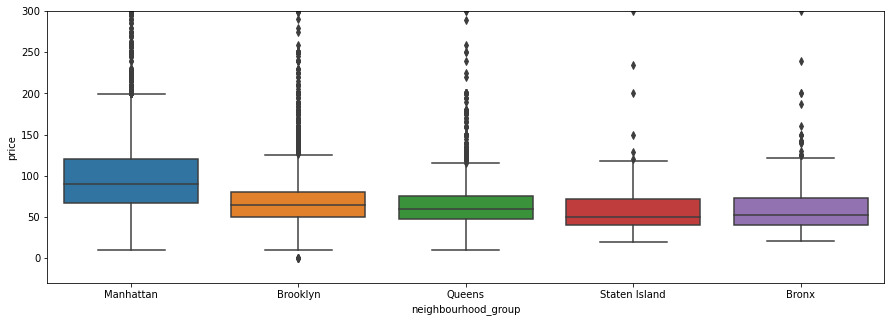

In [21]:
plt.figure(figsize=(15,5))
#Here we have restricted the y-axis between 0 and 300 
plt.ylim(-30,300)
sns.boxplot(x='neighbourhood_group',y='price',data=pr)
plt
plt.show()


In [24]:
# Mean, median and different quartiles and outliers  for private room in different neighbourhood 
pr.groupby(pr['neighbourhood_group']).price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,459.0,67.337691,120.472529,21.0,40.0,53.0,73.0,2500.0
Brooklyn,7050.0,76.117872,111.853173,0.0,50.0,64.0,80.0,5000.0
Manhattan,5602.0,117.323456,190.916733,10.0,67.0,90.0,120.0,9999.0
Queens,2352.0,68.716412,59.525037,10.0,48.0,60.0,75.0,2000.0
Staten Island,131.0,61.198473,38.050052,20.0,40.0,50.0,71.5,300.0


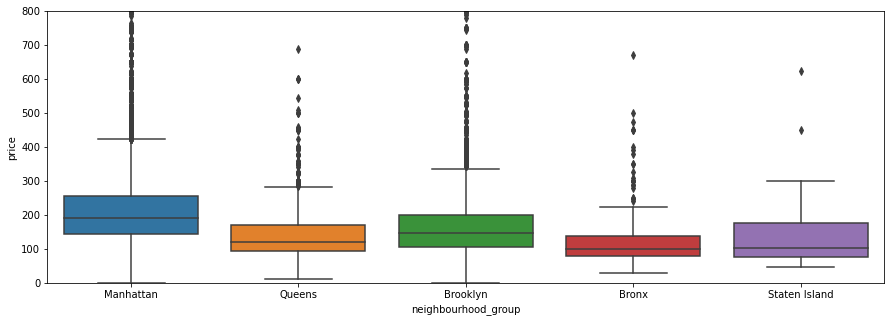

In [30]:
plt.figure(figsize=(15,5))
#Here we have restricted the y-axis between 0 and 500 
plt.ylim(0,800)
sns.boxplot(x='neighbourhood_group',y='price',data=home)
plt
plt.show()

In [25]:
# Mean, median and different quartiles and outliers  for private room in different neighbourhood 
home.groupby(home['neighbourhood_group']).price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,268.0,127.455224,101.120399,28.0,79.0,100.0,139.0,1000.0
Brooklyn,6711.0,181.116525,251.806081,0.0,105.0,146.0,199.0,10000.0
Manhattan,9251.0,249.621554,338.568558,0.0,143.0,190.0,255.0,10000.0
Queens,1487.0,148.470746,135.556613,10.0,94.0,120.0,170.0,2600.0
Staten Island,112.0,187.964286,478.771399,48.0,75.0,101.5,175.0,5000.0


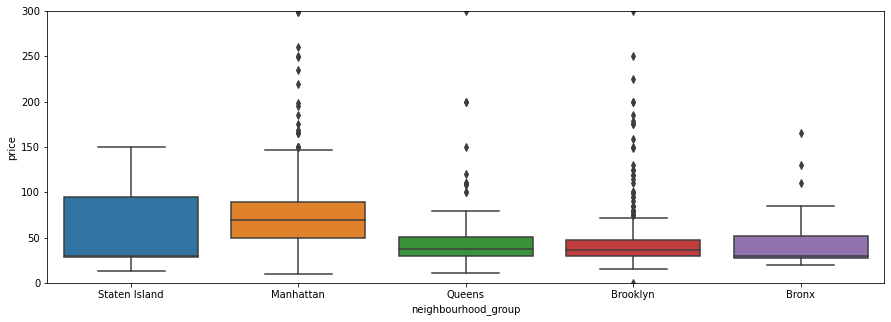

In [32]:
plt.figure(figsize=(15,5))
#Here we have restricted the y-axis between 0 and 300 
plt.ylim(0,300)
sns.boxplot(x='neighbourhood_group',y='price',data=Sr)
plt
plt.show()

In [26]:
# Mean, median and different quartiles and outliers  for private room in different neighbourhood 
Sr.groupby(Sr['neighbourhood_group']).price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,40.0,63.550000,123.463677,20.0,27.5,30.0,52.00,800.0
Brooklyn,272.0,52.257353,60.448813,0.0,30.0,36.0,47.00,725.0
Manhattan,340.0,88.429412,91.683136,10.0,50.0,69.0,89.25,1000.0
Queens,146.0,73.767123,194.867383,11.0,30.0,37.5,50.75,1800.0
Staten Island,5.0,63.400000,57.743398,13.0,29.0,30.0,95.00,150.0


# we have seen zero price properties in the brooklyn neighbourhood only so those properties can also be removed

In [15]:
var_position=Sr[['price']].idxmax()

#pr.columns

Sr.head()
#va=pr['name'][var_position]
#pr['name'][var_position]
#pr.head(20)
df=Sr[Sr.price == Sr.price.max()]
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
29906,11234747,Mins away to Manhattan Suite Residence,24146326,Julien,Queens,Astoria,40.76626,-73.93054,Shared room,1800,3,5,2017-04-09,0.13,2,90


# Similar plots for Entire home

Text(0, 0.5, 'Price ($/night)')

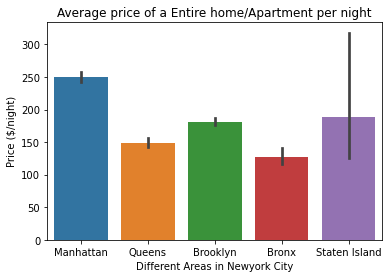

In [16]:
sns.barplot(home['neighbourhood_group'],home['price'])
plt.title('Average price of a Entire home/Apartment per night')
plt.xlabel('Different Areas in Newyork City')
plt.ylabel('Price ($/night)')

Text(0, 0.5, 'Price ($/night)')

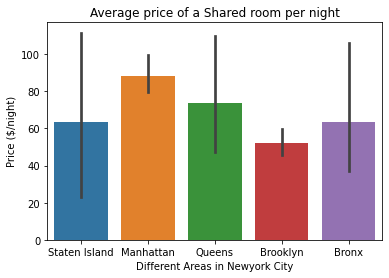

In [17]:
sns.barplot(Sr['neighbourhood_group'],Sr['price'])
plt.title('Average price of a Shared room per night')
plt.xlabel('Different Areas in Newyork City')
plt.ylabel('Price ($/night)')

In [18]:
s1=Sr.loc[Sr['neighbourhood_group']=='Manhattan']
s1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.400000e+02,3.400000e+02,340.000000,340.000000,340.000000,340.000000,340.000000,257.000000,340.000000,340.000000
mean,2.149793e+07,1.001471e+08,40.769129,-73.972632,88.429412,7.570588,21.326471,1.779961,3.688235,141.591176
std,1.094318e+07,9.568637e+07,0.037006,0.020992,91.683136,55.320768,37.212567,1.734454,5.200111,145.946410
min,1.204800e+04,7.549000e+03,40.703720,-74.015640,10.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,1.199484e+07,1.860110e+07,40.743913,-73.988642,50.000000,1.000000,1.000000,0.380000,1.000000,0.000000
50%,2.301327e+07,4.510284e+07,40.765430,-73.980935,69.000000,1.000000,5.500000,1.310000,2.000000,83.000000
75%,3.121772e+07,1.920155e+08,40.793650,-73.953052,89.250000,2.000000,23.000000,2.700000,4.000000,320.000000
max,3.648561e+07,2.724777e+08,40.869310,-73.916820,1000.000000,999.000000,229.000000,9.120000,28.000000,365.000000


In [ ]:
p1=data.groupby([data['room_type'],data['neighbourhood_group']])

In [ ]:
p1.mean()

In [ ]:
sns.barplot(p1['neighbourhood_group'],p1['price'])